In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn.model_selection as mod
import sklearn.metrics as metrics

%matplotlib inline

In [158]:
raw_data = pd.read_csv('CarPrice_Assignment.csv')

In [159]:
raw_data.drop(['car_ID','CarName','enginelocation','fuelsystem'],axis = 1,inplace=True)

I have dropped the above 4 columns as, car id is not imp. for regression,I dont know how to use car name in algorithm, engine location is dropped because there are very few case of rear engine and I don't know how the fuel system would effect the price of car

In [160]:
raw_data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

In [161]:
raw_data['symboling(3)'] = raw_data['symboling'].apply(lambda x : 1 if x==3 else 0)

In [162]:
raw_data['symboling(1)'] = raw_data['symboling'].apply(lambda x : 1 if x==1 else 0)

In [163]:
raw_data['symboling(2)'] = raw_data['symboling'].apply(lambda x : 1 if x==2 else 0)

In [164]:
raw_data['symboling(0)'] = raw_data['symboling'].apply(lambda x : 1 if x==0 else 0)

In [165]:
raw_data['symboling(-1)'] = raw_data['symboling'].apply(lambda x : 1 if x == -1 else 0)

In [166]:
raw_data['symboling(-2)'] = raw_data['symboling'].apply(lambda x : 1 if x == -2 else 0)

In [167]:
raw_data.drop(['symboling'],axis=1,inplace=True)

In [168]:
raw_data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [169]:
raw_data['fueltype'] = raw_data['fueltype'].apply(lambda x : 1 if x == 'gas' else 0)

In [170]:
raw_data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [171]:
raw_data['aspiration'] = raw_data['aspiration'].apply(lambda x : 1 if x == 'turbo' else 0)

In [172]:
raw_data['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [173]:
raw_data['doornumber'] = raw_data['doornumber'].apply(lambda x : 1 if x == 'two' else 0)

In [174]:
raw_data['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [175]:
raw_data['carbody(c)'] = raw_data['carbody'].apply(lambda x : 1 if x == 'convertible' else 0)

In [176]:
raw_data['carbody(h)'] = raw_data['carbody'].apply(lambda x : 1 if x == 'hatchback' else 0)

In [177]:
raw_data['carbody(s)'] = raw_data['carbody'].apply(lambda x : 1 if x == 'sedan' else 0)

In [178]:
raw_data['carbody(w)'] = raw_data['carbody'].apply(lambda x : 1 if x == 'wagon' else 0)

In [179]:
raw_data['carbody(h)'] = raw_data['carbody'].apply(lambda x : 1 if x == 'hardtop' else 0)

In [180]:
raw_data.drop(['carbody'],axis=1,inplace=True)

In [181]:
raw_data['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [182]:
raw_data['drivewheel(r)'] = raw_data['drivewheel'].apply(lambda x : 1 if x == 'rwd' else 0)

In [183]:
raw_data['drivewheel(f)'] = raw_data['drivewheel'].apply(lambda x : 1 if x == 'fwd' else 0)

In [184]:
raw_data['drivewheel(4)'] = raw_data['drivewheel'].apply(lambda x : 1 if x == '4wd' else 0)

In [185]:
raw_data.drop(['drivewheel'],axis=1,inplace=True)

In [186]:
raw_data['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [187]:
raw_data['enginetype(d)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'dohc' else 0)

In [188]:
raw_data['enginetype(ov)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'ohcv' else 0)

In [189]:
raw_data['enginetype(o)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'ohc' else 0)

In [190]:
raw_data['enginetype(l)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'l' else 0)

In [191]:
raw_data['enginetype(r)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'rotor' else 0)

In [192]:
raw_data['enginetype(of)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'ohfc' else 0)

In [193]:
raw_data['enginetype(dv)'] = raw_data['enginetype'].apply(lambda x : 1 if x == 'dohcv' else 0)

In [194]:
raw_data.drop(['enginetype'],axis=1,inplace=True)

In [195]:
raw_data.shape

(205, 38)

In [196]:
raw_data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [197]:
def update_cn(x):
    if x == 'four':
        return 4
    elif x == 'six':
        return 6
    elif x == 'five':
        return 5
    elif x == 'three':
        return 3
    elif x == 'twelve':
        return 12
    elif x == 'two':
        return 2
    else:
        return 8

In [198]:

raw_data['cylindernumber'] = raw_data['cylindernumber'].apply(update_cn)

The below commands are to normalize the features for linear regression

In [199]:
raw_data['wheelbase'] = raw_data['wheelbase']/raw_data['wheelbase'].mean()

In [200]:
raw_data['carlength'] = raw_data['carlength']/raw_data['carlength'].mean()

In [201]:
raw_data['carwidth'] = raw_data['carwidth']/raw_data['carwidth'].mean()

In [202]:
raw_data['carheight'] = raw_data['carheight']/raw_data['carheight'].mean()

In [203]:
raw_data['curbweight'] = raw_data['curbweight']/raw_data['curbweight'].mean()

In [204]:
raw_data['enginesize'] = raw_data['enginesize']/raw_data['enginesize'].mean()

In [205]:
raw_data['boreratio'] = raw_data['boreratio']/raw_data['boreratio'].mean()

In [206]:
raw_data['stroke'] = raw_data['stroke']/raw_data['stroke'].mean()

In [207]:
raw_data['compressionratio'] = raw_data['compressionratio']/raw_data['compressionratio'].mean()

In [208]:
raw_data['horsepower'] = raw_data['horsepower']/raw_data['horsepower'].mean()

In [209]:
raw_data['peakrpm'] = raw_data['peakrpm']/raw_data['peakrpm'].mean()

In [210]:
raw_data['citympg'] = raw_data['citympg']/raw_data['citympg'].mean()

In [211]:
raw_data['highwaympg'] = raw_data['highwaympg']/raw_data['highwaympg'].mean()

In [212]:
raw_data['cylindernumber'] = raw_data['cylindernumber']/10

In [213]:
Y = np.array(raw_data['price']).reshape(-1,1)

In [214]:
raw_data.drop(['price'],axis=1,inplace=True)

In [215]:
X = np.array(raw_data)

In [216]:
X = np.concatenate(((np.ones((len(Y),1))),X),axis=1)

In [217]:
X.shape

(205, 38)

In [218]:
Y.shape

(205, 1)

In [219]:
theta = np.zeros((38,1))

In [220]:
theta.shape

(38, 1)

In [221]:
Xtrain, Xtest, Ytrain, Ytest = mod.train_test_split(X,Y,test_size=0.2)

In [222]:
def compute_cost(x,y,theta):
    h_x = x.dot(theta)
    J = (1/2*len(y))*sum((np.square(h_x - y)))
    return J       ######This function returns the value of cost function

In [223]:
def gradient_descent(x,y,theta,alpha,iteration):
    J_hist = []
    print('descent started .......')
    for i in range(iteration):
        h_x = x.dot(theta)
        J_hist.append(compute_cost(x,y,theta))
        theta = theta -(alpha/len(y))*(np.dot(x.T,h_x-y))
    print('descent finished.')
    return theta, J_hist    ########This function is used to train our linear regression model using gradient descent t


In [224]:
final_theta, cost_history = gradient_descent(Xtrain,Ytrain,theta,0.01,20000)

descent started .......
descent finished.


In [225]:
final_theta # here final_theta is the final array of regression coefficients which minimize the cost function 

array([[-2.32954660e+03],
       [-4.50445004e+03],
       [-8.30596716e+02],
       [-5.36564556e+02],
       [ 2.62524949e+03],
       [ 7.96621923e+02],
       [ 6.05133248e+02],
       [ 1.45197452e+03],
       [ 6.15313481e+03],
       [ 3.42695572e+03],
       [ 1.27338036e+04],
       [-5.22161931e+03],
       [-6.92454218e+03],
       [-1.01535507e+03],
       [ 6.37766512e+03],
       [ 3.45302256e+03],
       [-2.14749769e+02],
       [-1.65358690e+03],
       [ 6.19455937e-01],
       [ 8.03590140e+02],
       [-2.68980327e+02],
       [ 4.34918265e+01],
       [-4.17933409e+02],
       [-2.49033429e+03],
       [ 4.49994243e+03],
       [ 2.10455604e+03],
       [ 9.55868283e+02],
       [-6.32293257e+02],
       [-4.34983671e+01],
       [-1.10766232e+03],
       [-1.17838591e+03],
       [-2.90755593e+03],
       [-5.68360576e+03],
       [ 3.03014431e+01],
       [-1.11274453e+03],
       [ 4.57712851e+03],
       [ 0.00000000e+00],
       [-2.62870865e+03]])

In [226]:
len(cost_history)

20000

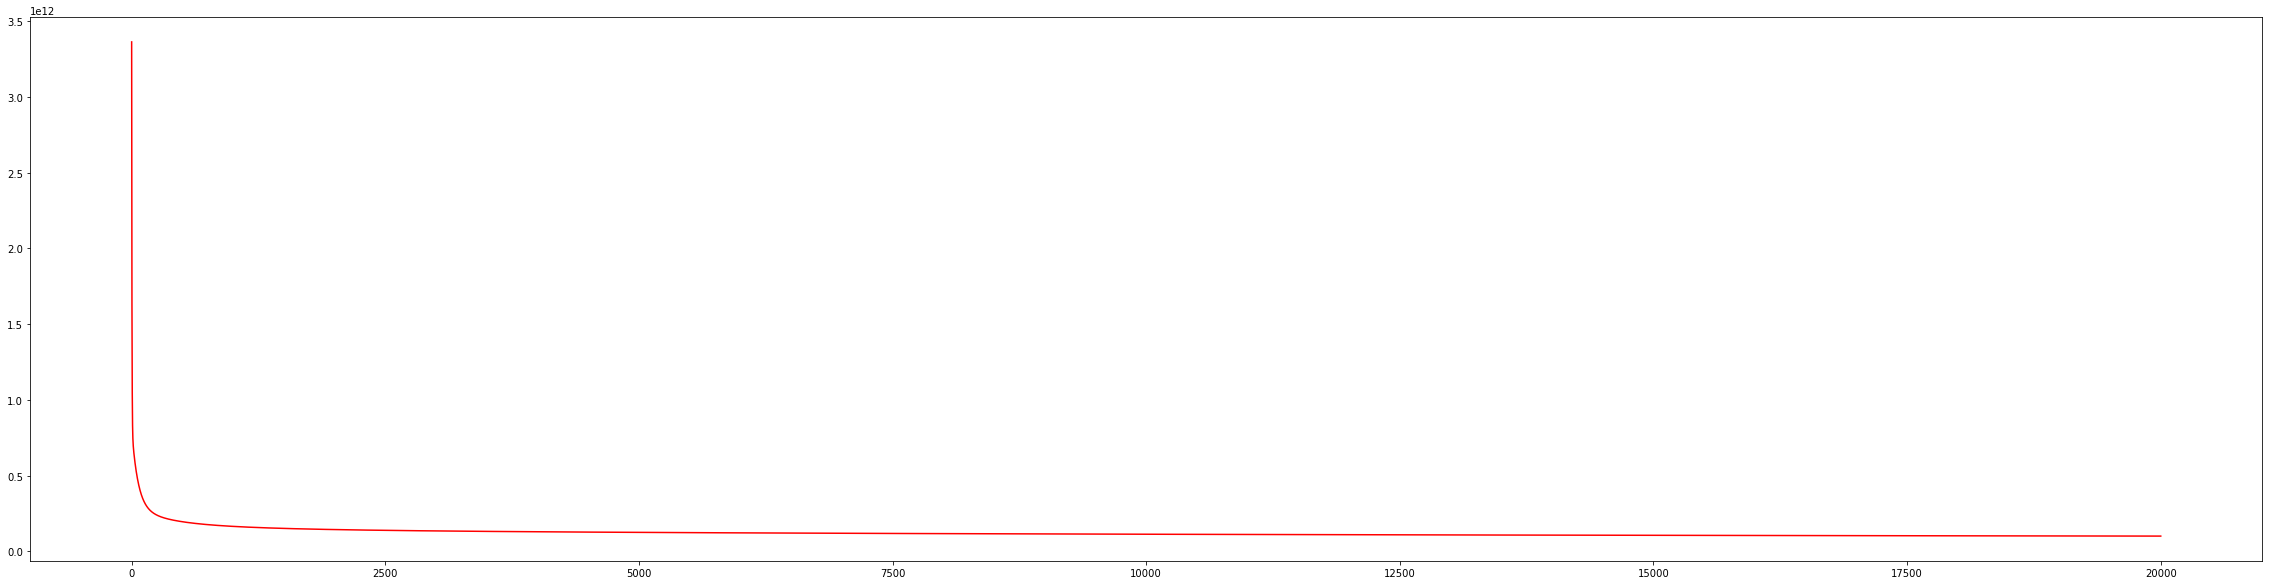

In [227]:
plt.figure(figsize=(40,10))
plt.plot(list(range(1,20001)),cost_history,color='red')

In [228]:
Y_predict = Xtest.dot(final_theta)

In [229]:
Y_predict  ####Our final pediction

array([[ 8950.83940841],
       [11102.95015639],
       [25298.19498982],
       [ 8322.03524257],
       [12085.00866273],
       [ 5572.57534311],
       [10306.51802619],
       [ 6188.5982755 ],
       [ 9655.63724074],
       [ 5792.15547749],
       [30173.65322428],
       [ 6288.2796997 ],
       [ 4835.35960869],
       [10594.22578304],
       [11429.68952699],
       [ 5998.90576096],
       [16821.77561111],
       [ 9571.65980233],
       [11415.73450658],
       [11860.15019982],
       [11049.68218304],
       [10261.77516305],
       [20485.66044307],
       [ 8473.95731595],
       [16357.52879018],
       [18234.58395998],
       [17802.51198165],
       [17831.09363851],
       [ 8894.67322632],
       [ 6665.7606621 ],
       [24335.30948846],
       [30649.65891724],
       [17184.29789749],
       [16258.22821651],
       [ 5560.5366496 ],
       [ 6263.06125529],
       [ 9717.27189183],
       [12047.3838809 ],
       [10181.81312643],
       [16147.41300167],


In [230]:
Ytest 

array([[ 7788. ],
       [10245. ],
       [25552. ],
       [ 8238. ],
       [ 9279. ],
       [ 6795. ],
       [ 9295. ],
       [ 7999. ],
       [ 9895. ],
       [ 6338. ],
       [32528. ],
       [ 6229. ],
       [ 6189. ],
       [10898. ],
       [ 9549. ],
       [ 7898. ],
       [11199. ],
       [ 7126. ],
       [ 9960. ],
       [ 6989. ],
       [10345. ],
       [10595. ],
       [15998. ],
       [ 7895. ],
       [13295. ],
       [18150. ],
       [13860. ],
       [14399. ],
       [ 7975. ],
       [ 7198. ],
       [28248. ],
       [35056. ],
       [22625. ],
       [13495. ],
       [ 6095. ],
       [ 8916.5],
       [11248. ],
       [11259. ],
       [10198. ],
       [12629. ],
       [12945. ]])

In [231]:
metrics.r2_score(Ytest,Y_predict)

0.8730692983977346

In [232]:
metrics.mean_squared_error(Ytest, Y_predict)**0.5

2465.0307746189865